In [ ]:
# Itinializing the Jopyter Notebook file WeatherPy.ipynb

In [1]:
# Importing relevant modules 
import requests
import json
from config import api_key

In [2]:
# Importing PrettyPrint module for a more readable JSON formatting
from pprint import pprint

In [4]:
# Import citypy 
from citipy import citipy

In [19]:
city=citipy.nearest_city(-10.0,20.21)
city.city_name

'saurimo'

In [85]:
# Initialize empty lists
city_names=[]
lat=[]
lon=[]
city_count=0

# Import numpy random for generating random range of latitude and longitude numbers  
from numpy import random

# set up while loop that will run until 500 valid city names are generated
while city_count<1000 :    
#   latitude values trange from -90 to 90 
    rand_lat= -180 + 360 * random.random(1)[0]
    lat.append(rand_lat)

    #   longitude ranges from -180 to 180  
    rand_lon= -90 + 180 * random.random(1)[0]
    lon.append(rand_lon)
    try :
        rand_city=citipy.nearest_city(rand_lat, rand_lon)
        city_names.append(rand_city.city_name)
        city_count+=1
    except (ValueError):
        print("No city found")

Text(0.5, 1.0, 'Location of 1000 sampled cities (in lon&lat coordinates)')

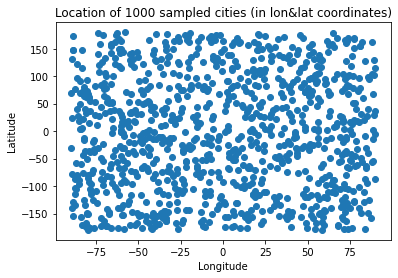

In [90]:
# Import matplotlib and plot sampled points to check visually for good coverage/diversity 
import matplotlib.pyplot as plt

plt.scatter(lon, lat)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Location of 1000 sampled cities (in lon&lat coordinates)")

In [95]:
# Create dictionary of city names and associated lat, lon coordinates
import pandas as pd

city_dict={
    "City name": city_names,
    'Longitude': lon,
    'Latitude': lat
}
city_data=pd.DataFrame(city_dict)
city_data.head()

,City name,Longitude,Latitude
0,port alfred,56.152266,-94.258084
1,victoria,55.993686,0.923506
2,jamestown,-7.355572,-13.456428
3,siddipet,79.054175,17.917054
4,namibe,8.886557,-14.720410


In [97]:
# Setup base url for OpenWeatherMap API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Building query URL
query_url = base_url + "appid=" + api_key + "&q=" + city_data['City name'][0]
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=0cb0504e124c591594132d882d112599&q=port alfred'

In [98]:
# Retriev weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Review the data API pulled
pprint(weather_json)

# Below fisrt work on setting up and troubleshooting calls to pull temperature in K 
# and convert to F, humidity (%), cloudiness (%) and wind speed (mph)

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': -33.5906, 'lon': 26.891},
 'dt': 1621961820,
 'id': 964432,
 'main': {'feels_like': 291.8,
          'grnd_level': 1016,
          'humidity': 83,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 291.72,
          'temp_max': 291.72,
          'temp_min': 291.72},
 'name': 'Port Alfred',
 'sys': {'country': 'ZA', 'sunrise': 1621919048, 'sunset': 1621955697},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 235, 'gust': 4.71, 'speed': 3.77}}


In [99]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [100]:
weather_json['main'].keys()

dict_keys(['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'sea_level', 'grnd_level'])

In [101]:
weather_json['main']['temp']

291.72

In [108]:
temp_F= ( weather_json['main']['temp'] - 273.15 ) * 9 / 5 + 32
round(temp_F,2)

65.43

In [110]:
humidity_pct = weather_json['main']['humidity']
humidity_pct

83

In [112]:
cloudiness_pct = weather_json['clouds']['all']

96

In [113]:
wind_speed = weather_json['wind']['speed']
wind_speed

3.77